## Listing Policy Files and Loading DataFrames:


This block lists all policy files uploaded and constructs their file paths. Then, it loads each CSV file into a pandas DataFrame and stores them in a dictionary where the keys are the state names.



In [1]:
import pandas as pd
import os

# List all policy files uploaded
policy_files = [f"policy/{state}_policy.csv" for state in [
    "Alabama", "Alaska", "American Samoa", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
    "Delaware", "DistrictofColumbia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois",
    "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey",
    "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virgin Islands", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]]

# Load all files into a dictionary of dataframes
state_policies = {os.path.basename(file).split('_')[0]: pd.read_csv(file) for file in policy_files}


In [2]:
import os
import pandas as pd

# Directory path
directory_path = "policy"

# List all files in the directory and filter for policy CSV files
policy_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith("_policy.csv")]

# Load and concatenate all policy data files
policy_data_list = [pd.read_csv(file) for file in policy_files]
policy_data = pd.concat(policy_data_list, ignore_index=True)

## Inspecting DataFrame Consistency:


This block iterates over the dictionary of DataFrames and prints the shape (number of rows and columns) and column names of each DataFrame, allowing for inspection of data consistency.



In [3]:
# Print the shape and column names of each dataframe to inspect consistency
for state, df in state_policies.items():
    print(f"{state}: {df.shape}, Columns: {df.columns}")


Alabama: (84, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', 'Education', 'Health/Medical',
       'Emergency Level', 'Transportation', 'Budget', 'Social Distancing',
       'Other', 'Vaccine'],
      dtype='object')
Alaska: (65, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', 'Education', 'Health/Medical',
       'Emergency Level', 'Transportation', 'Budget', 'Social Distancing',
       'Other', 'Vaccine'],
      dtype='object')
American Samoa: (35, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', 'Education', 'Health/Medical',
       'Emergency Level', 'Transportation', 'Budget', 'Social Distancing',
       'Other', 'Vaccine'],
      dtype='object')
Arizona: (159, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', '

## Visualizing Policy Frequencies:


In [4]:


# Display the structure and a brief overview of the concatenated data
policy_data.info(), policy_data.head()# Data Cleaning: Handling missing values and transforming data as needed

# Converting 'date' column to datetime format
policy_data['date'] = pd.to_datetime(policy_data['date'], errors='coerce', format='%d-%b-%y')

# Filling missing values in categorical columns with 'No' or similar to indicate absence of a policy
columns_to_fill = ['Restrict/Close', 'Opening (State)', 'Deferring to County', 'Testing',
                   'Education', 'Health/Medical', 'Emergency Level', 'Transportation',
                   'Budget', 'Social Distancing', 'Vaccine', 'Opening (County)']

for col in columns_to_fill:
    policy_data[col] = policy_data[col].fillna('No')

# Dropping any column or row that does not add value to the analysis
policy_data.drop(columns=['Unnamed: 14'], inplace=True)  # Drop completely empty column

# Check for any remaining missing values and provide an overview of the cleaned data
policy_data.info(), policy_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7277 entries, 0 to 7276
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 7260 non-null   object 
 1   policy               7260 non-null   object 
 2   Restrict/Close       912 non-null    object 
 3   Opening (State)      780 non-null    object 
 4   Deferring to County  102 non-null    object 
 5   Testing              479 non-null    object 
 6   Education            480 non-null    object 
 7   Health/Medical       864 non-null    object 
 8   Emergency Level      330 non-null    object 
 9   Transportation       84 non-null     object 
 10  Budget               243 non-null    object 
 11  Social Distancing    253 non-null    object 
 12  Other                3697 non-null   object 
 13  Vaccine              628 non-null    object 
 14  Opening (County)     2 non-null      object 
 15  Unnamed: 14          0 non-null      f

(None,
         date                                             policy  \
 0 2020-03-06  Governor Ivey announced the formation of a Cor...   
 1 2020-03-10  Governor Ivey sent a memo to state agency head...   
 2 2020-03-13  Governor Ivey issued a state of emergency for ...   
 3 2020-03-14  Governor Ivey closed all Alabama public school...   
 4 2020-03-15  Governor Ivey authorized directors of all stat...   
 
   Restrict/Close Opening (State) Deferring to County Testing Education  \
 0             No              No                  No      No        No   
 1             No              No                  No      No        No   
 2             No              No                  No      No        No   
 3              Y              No                  No      No         Y   
 4             No              No                  No      No        No   
 
   Health/Medical Emergency Level Transportation Budget Social Distancing  \
 0             No              No             No     N

###### This block counts the frequency of each policy type being 'Yes' across all states and creates a bar plot to visualize the frequency of different policy types. It uses Matplotlib and Seaborn for plotting.







C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


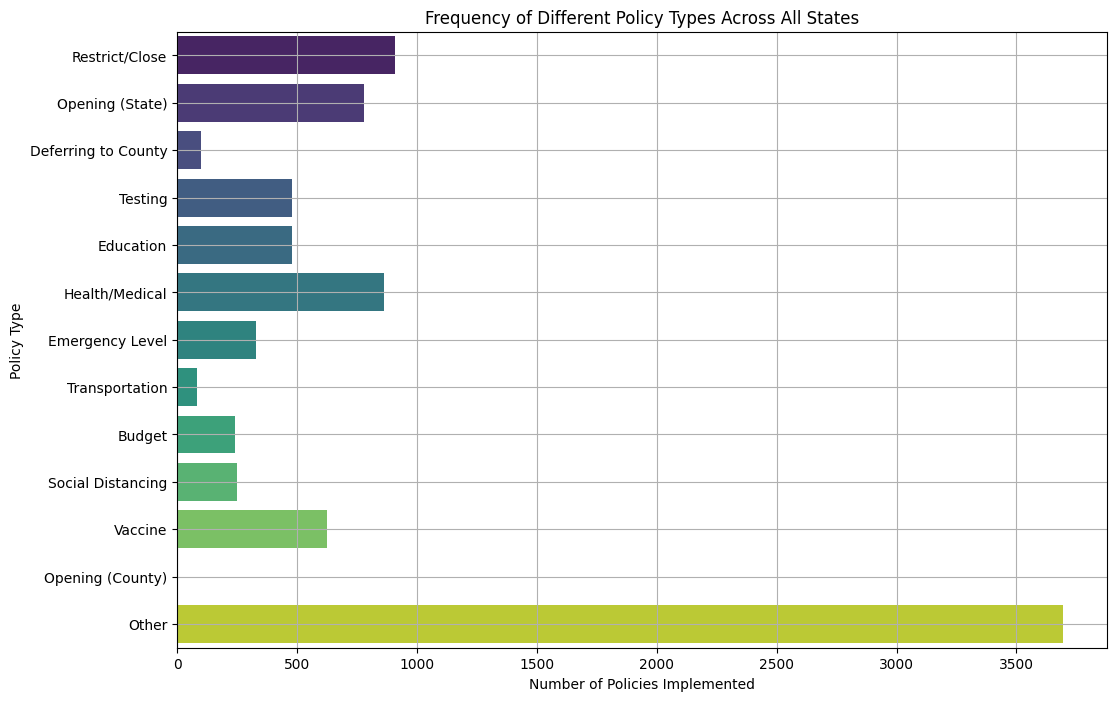

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each policy type being 'Yes'
policy_counts = policy_data[columns_to_fill + ['Other']].apply(lambda x: (x == 'Y').sum())

# Create a bar plot for visualization of policy frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x=policy_counts.values, y=policy_counts.index, palette="viridis")
plt.title('Frequency of Different Policy Types Across All States')
plt.xlabel('Number of Policies Implemented')
plt.ylabel('Policy Type')
plt.grid(True)
plt.show()


It then creates a bar plot to visualize the frequency of different policy types. This visualization provides insights into the prevalence of various policies across states. We can observe which policies are more commonly implemented and which are less common, providing an overview of the policy landscape across the country.







##### 